Timing test suite.

In the following cell: setting up
* imports
* reading data
* defining different functions that we want to time


In [1]:
import numpy as np
invm = np.linalg.inv
import xarray as xr
import matplotlib.pyplot as plt
from math import sqrt
from blockinv_iterative import block_iter_inv_fbm, block_iter_inv_fdm, block_inv
from blockinv_iterative_symmetric import block_inv_s, block_iter_inv_s, block_iter_inv_s2



In [5]:

invm1 = block_inv
ds_1 = xr.open_dataset("/home/pietaril/Documents/data/regions_verify_isotope_202112_cov.nc")
bio_1 = ds_1["covariance_bio"]
anth_1 = ds_1["covariance_anth"]

ds_2 = xr.open_dataset("/home/pietaril/Documents/data/regions_verify_202104_cov.nc")
bio_2 = ds_2["covariance_bio"]
anth_2 = ds_2["covariance_anth"]


#Exploring some of Akis nc files from CarbonTracker Puhti
ds_3 = xr.open_dataset("/home/pietaril/Documents/data/optimizer.20110902.nc")

ds_4 = xr.open_dataset("/home/pietaril/Documents/data/regions_esticc2_201801_cov.nc")


#M = bio_2.to_numpy()



#diag = np.diagonal(bio_2)
#part = diag[diag == 0.8]
#len(part)



/home/pietaril/.local/lib/python3.10/site-packages/xarray/conventions.py:522: SerializationWarning: variable 'sitecode' has multiple fill values {'!', b'!'}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [7]:
ds_2

<xarray.Dataset>
Dimensions:           (nparams_bio: 6858, nparams_anth: 6858,
                       nparams_anth2: 6858)
Coordinates:
  * nparams_bio       (nparams_bio) int64 0 1 2 3 4 ... 6853 6854 6855 6856 6857
  * nparams_anth      (nparams_anth) int64 0 1 2 3 4 ... 6854 6855 6856 6857
  * nparams_anth2     (nparams_anth2) int64 0 1 2 3 4 ... 6854 6855 6856 6857
Data variables:
    covariance_bio    (nparams_bio, nparams_bio) float64 ...
    covariance_anth   (nparams_anth, nparams_anth) float64 ...
    covariance_anth2  (nparams_anth2, nparams_anth2) float64 ...

CO2M_simulations
----------------


* See what kind of information these have in order to change Laia's create covariance matrix -code so that it includes locations

In [43]:
import netCDF4 as nc
import os

DATA_PATH = '/home/pietaril/Documents/data/CO2M_testdata/CO2M_simulations/S7A_CO2_02_XTC_____N_20250101T125303_20250101T133713_yyyymmddTHHMMSS_EUMT_DEV_T_TSTF__.nc'

ds = nc.Dataset(DATA_PATH, 'r')
xco2 = ds.groups['data']['observation_data']['xco2'][:]
#so the xco2 is just a masked_array consisting of an array of the same value repeated over again and a mask
xco2


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=9.969209968386869e+36,
  dtype=float64)

NameError: name 'typeof' is not defined

In [44]:
xco2_quality_flag = ds.groups['data']['observation_data']['xco2_quality_flag'][:]
uncertainties = ds.groups['data']['observation_data']['xco2_precision'][:]
lon = ds.groups['data']['geolocation_data_dem']['longitude'][:]
lat = ds.groups['data']['geolocation_data_dem']['latitude'][:]


In [45]:
xco2_quality_flag

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

In [55]:
uncertainties.data[500,100]

9.96921e+36

In [49]:
lat

masked_array(
  data=[[ 56.565327,  56.57273 ,  56.580112, ...,  57.272415,  57.278522,
          57.284622],
        [ 56.548626,  56.55603 ,  56.563408, ...,  57.255478,  57.26158 ,
          57.26768 ],
        [ 56.53193 ,  56.53933 ,  56.546703, ...,  57.23854 ,  57.24464 ,
          57.25074 ],
        ...,
        [-76.403564, -76.39113 , -76.37868 , ..., -74.97131 , -74.95643 ,
         -74.941505],
        [-76.388855, -76.37643 , -76.36399 , ..., -74.9579  , -74.94303 ,
         -74.928116],
        [-76.37414 , -76.361725, -76.3493  , ..., -74.94448 , -74.92962 ,
         -74.91473 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [50]:
lon

masked_array(
  data=[[  -5.72932  ,   -5.7678843,   -5.8064117, ...,   -9.834542 ,
           -9.874546 ,   -9.9146185],
        [  -5.739857 ,   -5.7784057,   -5.8169174, ...,   -9.84335  ,
           -9.883337 ,   -9.923391 ],
        [  -5.7503853,   -5.788919 ,   -5.827415 , ...,   -9.852153 ,
           -9.892121 ,   -9.932158 ],
        ...,
        [ 178.99725  ,  179.07985  ,  179.16217  , ..., -173.15613  ,
         -173.08833  , -173.02057  ],
        [ 178.95735  ,  179.03987  ,  179.12215  , ..., -173.19977  ,
         -173.13199  , -173.06425  ],
        [ 178.91751  ,  178.99998  ,  179.08221  , ..., -173.24335  ,
         -173.17558  , -173.10785  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

Laia's matrices
----------------

In [3]:
#this code for opening the ones that have been compressed into .gz-files

import numpy as np
import gzip
import shutil

# Decompress the .gz file
with gzip.open('../../data/CO2M_testdata/cov_4000.npy.gz', 'rb') as f_in:
    with open('matrix.npy', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Load the matrix from the .npy file
M = np.load('matrix.npy')

<gzip on 0x7f11f5bdd750>

In [15]:

M = np.load("../../data/CO2M_testdata/output/uncertainty_covariance_matrix20250126.npy", "r") 
#M = xr.DataArray(M)

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

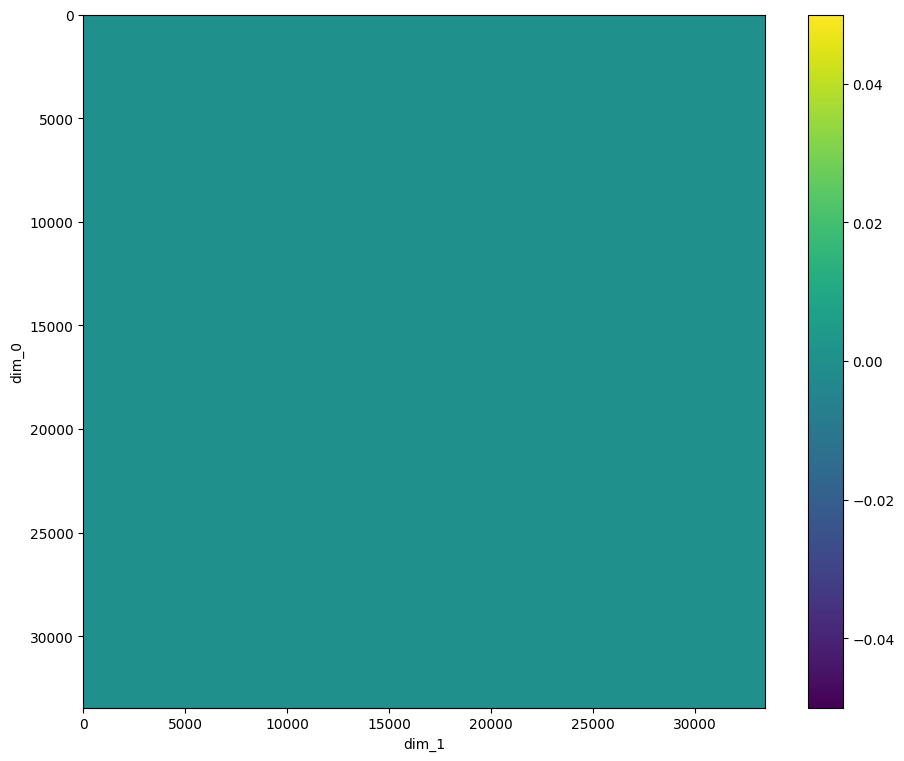

In [4]:

fig, ax = plt.subplots(figsize = (11,9))
M.plot.imshow(origin = 'upper', robust = True)

In [ ]:
M

TypeError: 'tuple' object is not callable

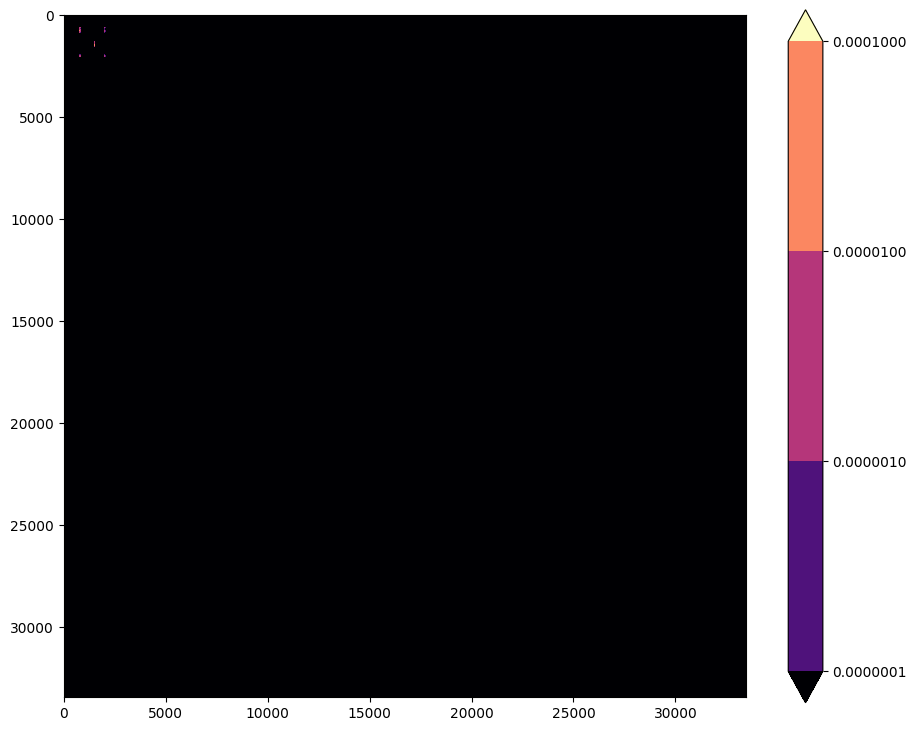

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
bounds = np.array([1e-8, 1e-7, 1e-6, 1e-5])

fig, ax = plt.subplots( figsize = (11,9))
pcm = ax.imshow(M, norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'), cmap='magma')
fig.colorbar(pcm, ax=ax, orientation='vertical')
plt.show()

In [5]:
ds_3.statevectordeviations_optimized.shape

(68580, 500)

In [3]:
ds_4

<xarray.Dataset>
Dimensions:          (latitude: 180, longitude: 360, nparams_bio: 2349,
                      nparams_anth: 2328)
Coordinates:
  * latitude         (latitude) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude        (longitude) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: nparams_bio, nparams_anth
Data variables:
    covariance_bio   (nparams_bio, nparams_bio) float64 ...
    covariance_anth  (nparams_anth, nparams_anth) float32 ...
    variance_bio     (latitude, longitude) float32 ...
    variance_anth    (latitude, longitude) float32 ...

In [7]:
ds_4.covariance_bio.shape

(2349, 2349)

In [11]:
from math import sqrt
print(sqrt(0.8))

0.8944271909999159


Matrix inv accuracy test

In [2]:
k = int(len(M)/2)

inv1 = invm(M)
#inv2 = block_iter_inv_fdi(M, 5)
#inv3 = block_iter_inv_fdm(M, 5)
#inv4 = block_iter_inv_fbm(M, 5)
inv4 = block_iter_inv_s(M, 5)
inv5 = block_iter_inv_s2(M,5)

print(np.allclose(inv1, inv4), np.allclose(inv1, inv5))

True True


Plotting

-6.616444912082444e-16


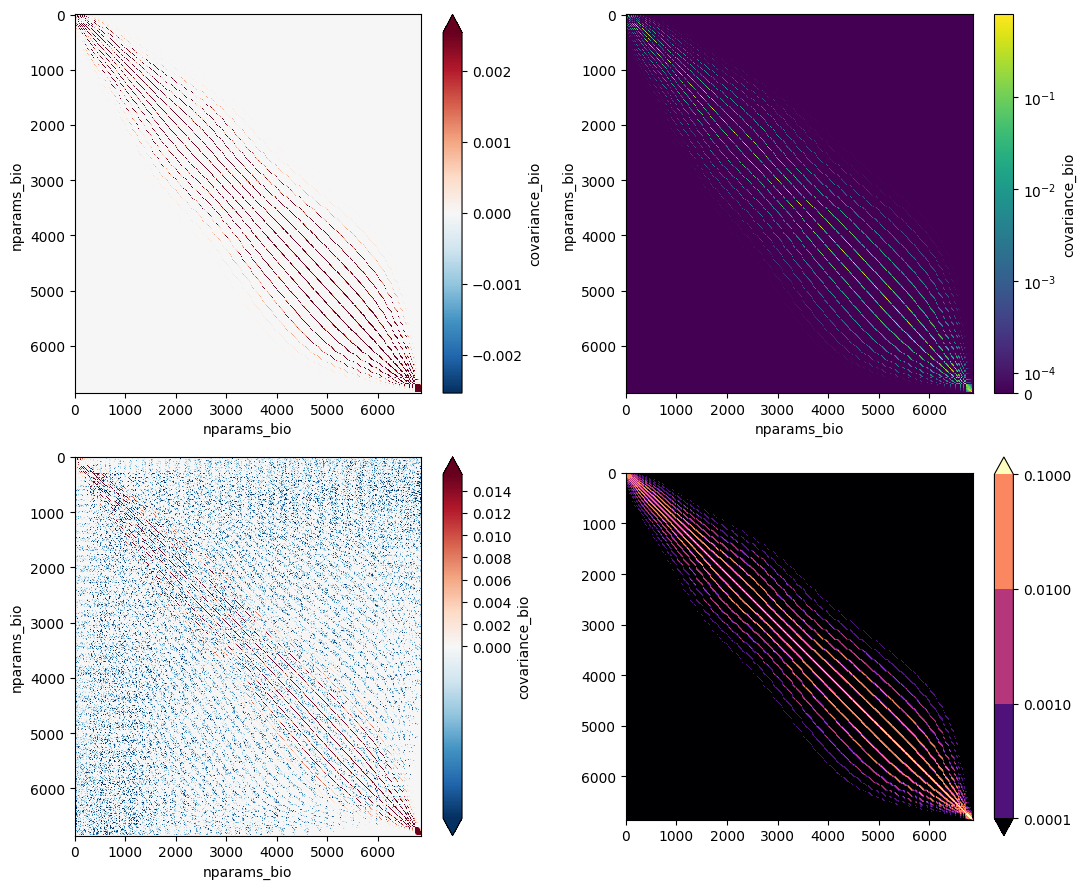

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shifted_colormap import shiftedColorMap
# inv1 = xr.DataArray(inv1)


minval = bio_2.values.min()
print(minval)
maxval = bio_2.values.max()
midval = 0.2
qlower = np.quantile(bio_2.values, 0.01)
qupper = np.quantile(bio_2.values, 0.99)
# 1 - maxval / (maxval + abs(minval))

bounds = np.array([1e-4, 1e-3, 1e-2, 1e-1])


orig_cmap = matplotlib.cm.bwr
shifted_cmap = shiftedColorMap(cmap = orig_cmap, min_val = minval, max_val = maxval, name='shifted')

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (11,9))
bio_2.plot.imshow(ax = ax0, origin = 'upper', robust = True)
bio_2.plot.imshow(ax = ax1, origin = 'upper', cmap = 'viridis',
 norm = colors.SymLogNorm(vmin = minval, vmax = maxval, linthresh = 0.0001, linscale = 0.2))
bio_2.plot.imshow(ax = ax2, origin = 'upper', norm = colors.TwoSlopeNorm(vcenter = 0, vmin = qlower, vmax = qupper))
pcm = ax3.imshow(bio_2, norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'), cmap='magma')
#bio_2.plot.imshow(ax = ax3, origin = 'upper', cmap = shifted_cmap)
fig.colorbar(pcm, ax=ax3, orientation='vertical')
plt.tight_layout()
plt.show()

# fig, ax = plt.subplots()
# bio_2.plot.imshow(origin = 'upper',
#  norm = colors.SymLogNorm(vmin = bio_2.values.min(), vmax = bio_2.values.max(), linthresh = 0.001, linscale=0.5))
# plt.tight_layout()
# plt.show()

NameError: name 'colors' is not defined

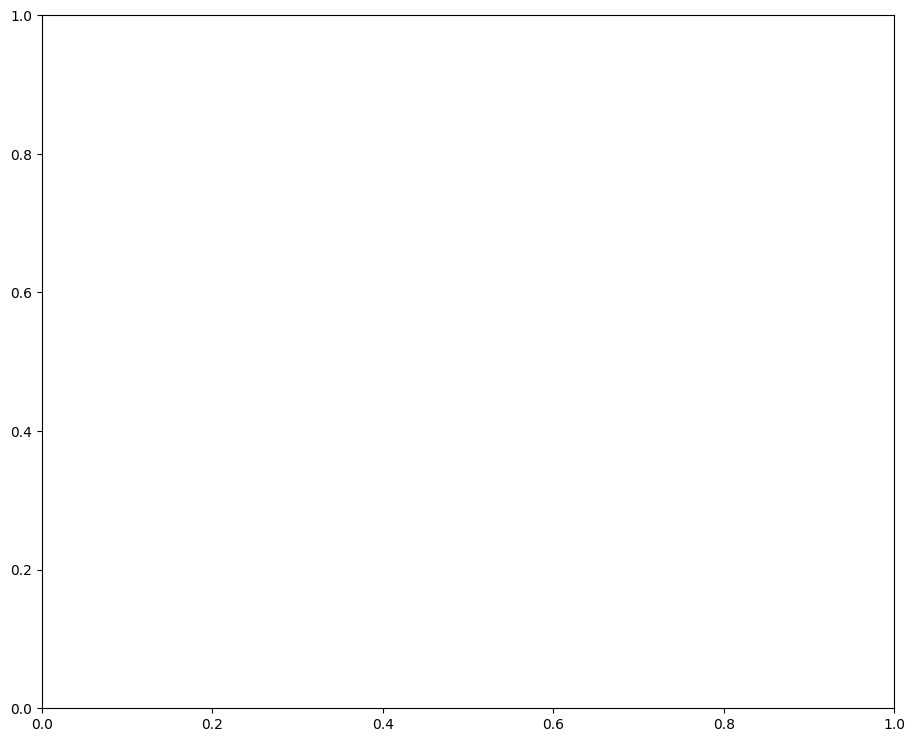

In [8]:
fig, ax = plt.subplots(figsize = (11,9))
pcm = ax.imshow(bio_2, norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'), cmap='magma')
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.show


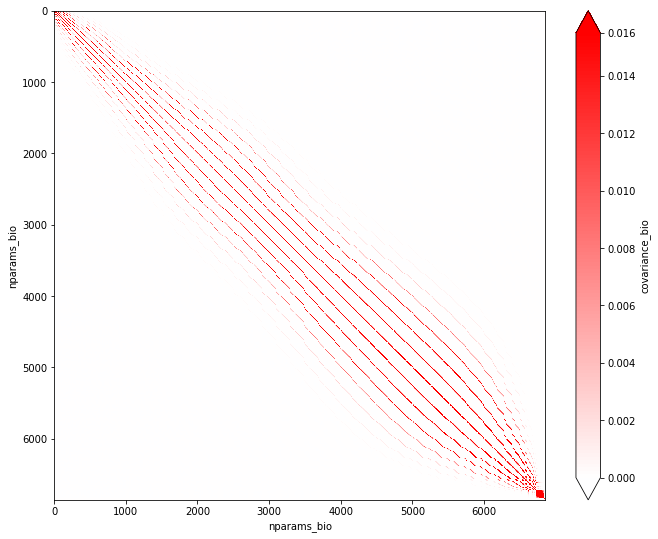

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

minval = np.quantile(bio_2.values, 0.01)
maxval = np.quantile(bio_2.values, 0.99)
# minval = bio_2.values.min()
# maxval = bio_2.values.max()

class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(vmin=minval, vmax=maxval, midpoint=0)
cmap = 'bwr' 


fig, ax = plt.subplots(figsize = (11,9))
bio_2.plot.imshow(cmap=cmap, norm=norm, origin = 'upper')
plt.show()

In [7]:
import matplotlib
import matplotlib.pyplot as plt
bio_2.plot.matshow()
plt.show()

AttributeError: '_PlotMethods' object has no attribute 'matshow'

Timer

In [6]:


# time_d = %timeit -r 7 -n 25 -o invm(M)
# time_fdi = %timeit -r 7 -n 25 -o block_iter_inv_fdi(M,5)
# time_fdm = %timeit -r 7 -n 25 -o block_iter_inv_fdm(M,5)
# time_fbm = %timeit -r 7 -n 25 -o block_iter_inv_fbm(M,5)

%timeit block_iter_inv_s2(M,5)
%timeit block_iter_inv_s(M,5)




4.41 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.8 s ± 2.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Timer results 

As far as I've understood, the timer runs -r <R> number of times and loops within each run -n <N> times, picking the minimum of those N loops.
So, to get accurate results, N should be rather large! 

BUT: FOR SOME REASON INCREASING NUMBER OF LOOPS ALSO SEEMS TO MAKE THE TIME LONGER, WHY? (e.g. s2: 7 runs 1 loop: 4.41 s ± 231 ms)

with M = bio_2.to_numpy(): 

np.linalg.inv:
* 8.57 s ± 358 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)

block_iter_inv(M,5) [with for-loop, ind assigns, calls np.linalg.inv]
* 7.42 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)

block_iter_inv(M,5) [with for-loop, multiple assign, calls np.linalg.inv] 
* 7.65 s ± 306 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)

block_iter_inv(M,5) [with for-loop, multiple assign, calls block_inv]
* 7.86 s ± 391 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)

block_iter_inv_s(M,5) [symmetric, uses transpose, with for & ind & def]
* 10.9 s ± 744 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)

block_iter_invs2(M,5) [symmetric, no transpose, with for & ind & def]
* 7.87 s ± 565 ms per loop (mean ± std. dev. of 7 runs, 25 loops each)




Older results with 10 runs, 10 loops:

default invm: 8.54 s ± 1.48 s per loop (mean ± std. dev. of 10 runs, 10 loops each)

block_iter_inv(M,5):
    * with for-loop and block_inv: 6.79 s ± 432 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
    * with for-loop and default inv: 7.52 s ± 1.31 s per loop (mean ± std. dev. of 10 runs, 10 loops each)


block_iter_inv_w(M,5), version using while-loop and block_inv: 7.1 s ± 392 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)

In [4]:
matrices = [bio_1.values, bio_2.values]
nstate = [len(ma) for ma in matrices]


time_np = [] #times for inversion with np.linalg.inv
time_bl = [] # times for inversion with block_iter_inv_fdi(M)

for ma in matrices:
    t_np = %timeit -r 7 -n 10 -o invm(ma)
    time_np.append(t_np)
    t_bl = %timeit -r 7 -n 10 -o block_iter_inv(ma)
    time_bl.append(t_bl)



results = xr.Dataset()
results["time_np"] = (("nstate"), time_np)
results["time_bl"] = (("nstate"), time_bl)



The slowest run took 12.00 times longer than the fastest. This could mean that an intermediate result is being cached.
243 µs ± 282 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 9.65 times longer than the fastest. This could mean that an intermediate result is being cached.
651 µs ± 664 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.44 s ± 465 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.57 s ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%load_ext scalene
%scrun block_iter_inv(M)


Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


In [2]:
%load_ext scalene
%scrun block_iter_inv_fdi(M)

Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.
